# Latar Belakang
Amazon Web Services (AWS) sebagai penyedia perangkat lunak sebagai Layanan (SaaS), menawarkan model perangkat lunak berbasis cloud yang mengirimkan aplikasi ke pengguna akhir melalui peramban internet. Vendor SaaS mengelola hosting layanan dan aplikasi yang dapat diakses pelanggan sesuai permintaan. Dengan penawaran SaaS dari AWS, pelanggan tidak perlu lagi khawatir tentang pemeliharaan layanan atau pengelolaan infrastruktur yang mendukungnya; yang mereka butuhkan hanyalah memfokuskan pada penggunaan perangkat lunak. Aspek lain yang khas dari model SaaS adalah struktur penetapan harga yang fleksibel, dimana pelanggan membayar berdasarkan langganan atau model bayar-per-pemakaian, yang merupakan alternatif dari pembelian lisensi penuh dari semua fungsionalitas secara langsung.

# Stakeholders
1. **CEO :** Agar dapat memahami secara menyeluruh tentang tren dan pola penjualan untuk mengarahkan strategi perusahaan dan membuat keputusan investasi.
2. **CFO dan Tim Keuangan:** Agar dapat memahami margin keuntungan dan dampak diskon terhadap profitabilitas untuk mengoptimalkan kesehatan finansial perusahaan.
3. **Manajer Penjualan dan Pemasaran:** Mereka yang bertanggung jawab dalam mengorganisir kampanye, penawaran dan diskon, serta analisis pasar dan segmentasi pelanggan.

# Permasalahan Bisnis
 

## 1. Analisis Penjualan Keseluruhan
- **Tujuan :** Mengukur kinerja operasi penjualan secara keseluruhan.
- **Analisis Tren: :** Menganalisis bagaimana perubahan penjualan seiring waktu, apakah ada pertumbuhan atau penurunan, dan jika ada pola musiman.

## 2. Tren Waktu
- **Tujuan :** Membandingkan kinerja penjualan di berbagai periode waktu.
- **Insight :** Mengidentifikasi pola musiman atau tren dan menyesuaikan inventaris atau kampanye pemasaran sesuai kebutuhan.

## 3. Analisis Kinerja Produk
- **Tujuan:** Memahami produk mana yang menghasilkan pendapatan dan keuntungan terbanyak.
- **Strategi:** Mengidentifikasi produk yang berkinerja kurang atau lebih untuk menyesuaikan stok dan strategi pemasaran.

## 4. Analisis Diskon
- **Tujuan:** Mengevaluasi bagaimana diskon mempengaruhi volume penjualan dan margin keuntungan.
- **Strategi:** Menentukan tingkat diskon optimal untuk meningkatkan penjualan tanpa mengorbankan keuntungan.

# Pemahaman Data

Dataset ini berisi data transaksi dari sebuah perusahaan SaaS (Software as a Service) fiktif yang menjual perangkat lunak penjualan dan pemasaran kepada perusahaan lain (B2B). Dalam dataset, setiap baris mewakili sebuah produk dalam transaksi, dan kolom-kolomnya mencakup:
Berikut adalah Dataset Asli: Sumber

<p><div class=pull-left>
<p><div class="text-justify">

|No.|Nama Kolom    |Deskripsi                                     |       
|---|---------------|---------------------------------------------------|
|1  |Row ID         |Pengenal unik untuk setiap transaksi         |
|2  |Order ID       |Pengenal unik untuk setiap pesanan               |
|3  |Order Date     |Tanggal ketika pesanan dibuat                |
|4  |Date Key       |Representasi numerik dari tanggal pesanan (YYYYMMDD)|
|5  |Contact Name   |Nama orang yang membuat pesanan        |
|6  |Country        |Negara tempat pesanan dibuat            |
|7  |City           |Kota tempat pesanan dibuat               |
|8  |Region         |Region tempat pesanan dibuat              |
|9  |Subregion      |Subregion tempat pesanan dibuat         |
|10 |Customer       |Nama perusahaan yang membuat pesanan     |
|11 |Customer ID    |Pengenal unik untuk setiap pelanggan             |
|12 |Industry       |Industri yang diikuti pelanggan               |
|13 |Segment        |Segmen pelanggan (SMB, Strategis, Perusahaan, dll)|
|14 |Product        |Produk yang dipesan                            |
|15 |License        |Kunci lisensi untuk produk                   |
|16 |Sales          |Total jumlah penjualan untuk transaksi        |
|17 |Quantity       |Total jumlah item dalam transaksi      |
|18 |Discount       |Diskon yang diterapkan pada transaksi         |
|19 |Profit         |Keuntungan dari transaksi                 |

# Persiapan Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
import matplotlib.dates as mdates

# Menyiapkan matplotlib untuk tampilan sebaris
%matplotlib inline

# Menetapkan gaya seaborn untuk plot
sns.set_style("whitegrid")


In [4]:
df = pd.read_csv (r"D:\PURWADHIKA\Capstone_Modul2\SaaS-Sales.csv")

# Explorasi Data Awal

In [5]:
# Melihat isi beberapa baris awal dan akhir data
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


In [6]:
# Melihat dimensi data
df.shape

(9994, 19)

In [7]:
# Melihat info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

# Pembersihan Data
Pembersikan data dilakukan untuk membantu dalam mengidentifikasi dan memperbaiki kesalahan yang timbul saat mengolah data. Dengan menghapus ketidakkonsistenan dan ketidakakuratan, data cleaning dapat memastikan bahwa suatu kumpulan data dapat dipercaya.

1. Memeriksa data duplikat
2. Memeriksa nilai yang hilang
3. Memeriksa kesalahan penulisan
4. Memeriksa data untuk 'Order Date' dan 'Date Key', jika keduanya sama, hapus salah satu
5. Memeriksa Kesalahan Logika:
- Nilai Sales harus positif
- Nilai Quantity harus positif
- Nilai Discount harus antara 0 dan 1
- Nilai License tidak boleh duplikat


In [8]:
# 1. Memeriksa data duplikat
df.duplicated().sum()

0

`Tidak Ditemukan Duplikasi Data`

In [9]:
# 2. Memeriksa nilai yang hilang
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

` Tidak Ditemukan Nilai Yang Hilang`

In [10]:
# 3. Memeriksa kesalahan penulisan
# Periksa nilai unik dengan mengonversi nilai string unik menjadi huruf kecil.
pd.set_option('display.max_colwidth', None) # Opsi tampilan untuk menampilkan lebar kolom penuh
uniqueItem = [] # Inisialisasi daftar kosong untuk menyimpan nilai unik dan tipe data setiap kolom

for column in df.columns:
    unique_values = df[column].unique()
    if isinstance(unique_values[0], str):  # Memeriksa apakah nilai uniknya adalah string
        unique_values = [value.lower() for value in unique_values]  # Mengubah nilai string unik menjadi huruf kecil
    uniqueItem.append([column.lower(), df[column].dtype, df[column].nunique(), unique_values])

unique = pd.DataFrame(columns=['Column', 'Data Type' , 'Unique Count', 'Unique Value'], data=uniqueItem)
unique

,Column,Data Type,Unique Count,Unique Value
0,row id,int64,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,order id,object,5009,"[emea-2022-152156, amer-2022-138688, emea-2021-108966, amer-2020-115812, emea-2023-114412, amer-2022-161389, apj-2021-118983, emea-2020-105893, emea-2020-167164, amer-2020-143336, amer-2022-137330, emea-2023-156909, emea-2021-106320, amer-2022-121755, emea-2021-150630, apj-2023-107727, apj-2022-117590, apj-2021-117415, apj-2023-120999, amer-2022-101343, emea-2023-139619, emea-2022-118255, amer-2020-146703, apj-2022-169194, apj-2021-115742, emea-2022-105816, emea-2022-111682, amer-2021-135545, apj-2021-164175, amer-2020-106376, emea-2022-119823, emea-2022-106075, amer-2023-114440, emea-2021-134026, apj-2023-118038, apj-2020-147606, emea-2022-127208, amer-2020-139451, emea-2021-149734, apj-2023-119662, amer-2023-140088, emea-2023-155558, apj-2022-159695, amer-2022-109806, emea-2021-149587, emea-2023-109484, emea-2023-161018, amer-2023-157833, emea-2022-149223, apj-2022-158568, emea-2022-129903, emea-2021-156867, emea-2023-119004, apj-2021-129476, emea-2023-146780, emea-2022-128867, amer-2020-115259, amer-2021-110457, emea-2021-136476, apj-2022-103730, apj-2020-152030, apj-2020-134614, amer-2023-107272, amer-2022-125969, amer-2023-164147, amer-2022-145583, emea-2022-110366, amer-2023-106180, emea-2023-155376, amer-2021-110744, amer-2020-110072, emea-2022-114489, amer-2022-158834, amer-2021-124919, amer-2021-118948, amer-2020-104269, apj-2022-114104, amer-2022-162733, emea-2021-119697, apj-2022-154508, amer-2022-113817, apj-2020-139892, amer-2020-118962, apj-2020-100853, apj-2023-152366, amer-2021-101511, emea-2021-137225, apj-2020-166191, emea-2020-158274, emea-2022-105018, amer-2020-123260, apj-2022-157000, emea-2021-102281, amer-2021-131457, amer-2020-140004, amer-2023-107720, emea-2023-124303, amer-2023-105074, emea-2020-133690, apj-2023-116701, ...]"
2,order date,object,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,date key,int64,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 2020082

In [11]:
# 4. Memeriksa data untuk 'Order Date' dan 'Date Key'
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Date Key']=pd.to_datetime(df['Date Key'].astype(str), format='%Y%m%d')
comparison_result = (df['Order Date'] == df['Date Key']).all()
comparison_result


True

In [12]:
# Karena keduanya sama, maka hilangkan kolom Date Key
df.drop('Date Key',inplace=True,axis=1)

In [13]:
# periksa apakah kunci tanggal telah berhasil dihilangkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   int64         
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

In [14]:
# 5. Memeriksa Kesalahan Logika : 
# 5a. Validasi nilai sales tidak boleh ada yg negatif
(df['Sales']<0).sum()

0

In [15]:
# 5b. Validasi nilai Quantity tidak boleh ada yg negatif atau 0
(df['Quantity']<=0).sum()

0

In [16]:
# 5c. Validasi nilai Discount berada antara 0 hingga 1
((df['Discount']<0) | (df['Discount']>1)).sum()

0

In [17]:
# 5d. Validasi nilai License tidak ada yang duplicate

df['License'].duplicated().sum()

0

## Kesimpulan Pembersihan Data

Saas DataFrame terdiri dari 9994 baris dan 19 kolom 
1. Proses verifikasi menunjukkan bahwa tidak ada data duplikat dalam set.
2. Semua nilai telah diperiksa dan tidak ada nilai yang hilang ditemukan.
3. Tidak terdapat kesalahan penulisan dalam data.
4. Kolom 'Date Key' telah dihilangkan karena 'Order Date' sudah memberikan informasi yang diperlukan tentang tanggal pemesanan secara efektif.
5. Pemeriksaan Kesalahan Logika menghasilkan :
    a.Tidak ada nilai Sales yang negatif.
    b.Tidak ada nilai Quantity yang negatif atau nol.
    c.Rentang nilai Discount sudah berada antara 0 hingga 1.
    d.Tidak ditemukan nilai License yang sama di setiap pesanan.
    
`Kesimpulan : Keseluruhan pembersihan data menunjukkan bahwa dataset Saas sudah dalam kondisi yang baik dan siap untuk analisis lebih lanjut.`

# Uji Outlier

Uji outlier dilakukan untuk memeriksa data yang menyimpang pada dataset numerik,
oleh karena itu uji outlier dilakukan untuk data : quantity, sales, discount dan profit

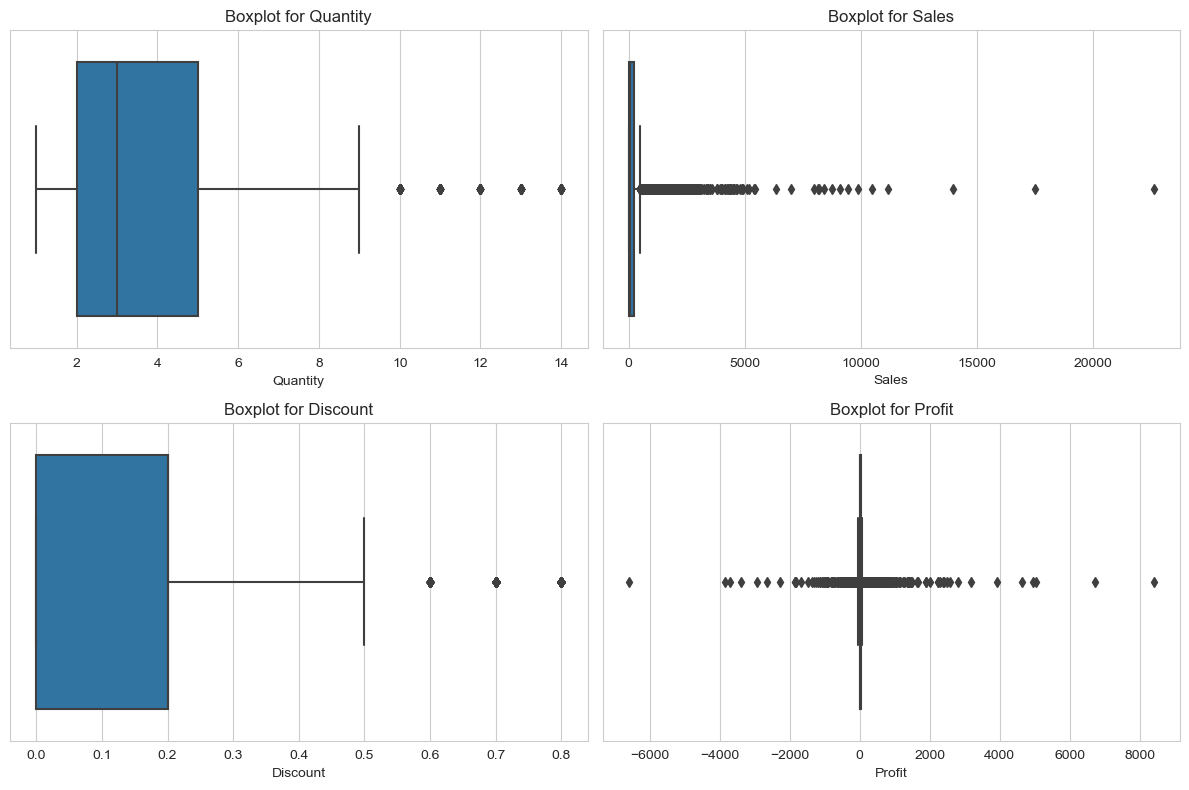

In [18]:
# Pilih kolom integer dari DataFrame
df_num = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Buat subplot untuk kolom
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Boxplot untuk Quantity
sns.boxplot(ax=axes[0, 0], x=df_num['Quantity'])
axes[0, 0].set_title('Boxplot for Quantity')

# Boxplot untuk Sales
sns.boxplot(ax=axes[0, 1], x=df_num['Sales'])
axes[0, 1].set_title('Boxplot for Sales')

# Boxplot untuk Discount
sns.boxplot(ax=axes[1, 0], x=df_num['Discount'])
axes[1, 0].set_title('Boxplot for Discount')

# Boxplot untuk Profit
sns.boxplot(ax=axes[1, 1], x=df_num['Profit'])
axes[1, 1].set_title('Boxplot for Profit')

plt.tight_layout()
plt.show()

### Boxplot untuk 'Quantity':
- Terdapat beberapa outlier pada sisi kanan, menunjukkan bahwa ada beberapa transaksi dengan jumlah produk yang sangat tinggi dibandingkan dengan transaksi biasa. Namun, outlier tidak terlalu jauh dari kuartil atas, sehingga mungkin ini adalah kasus penjualan dalam jumlah besar yang masih wajar.

### Boxplot untuk 'Sales':
- Outlier banyak terjadi di sisi kanan, yang mengindikasikan adanya penjualan dengan nilai yang jauh lebih tinggi daripada rata-rata penjualan. Ini bisa menandakan adanya transaksi besar atau klienan yang membeli dengan volume tinggi.

### Boxplot untuk 'Discount':
- Outlier terlihat di bagian kanan atas, dan cukup jarang. Ini mungkin menunjukkan kasus di mana diskon yang sangat tinggi diberikan. Penting untuk memastikan bahwa diskon tersebut memang direncanakan dan tidak ada kesalahan entri data.

### Boxplot untuk 'Profit':
- Boxplot menunjukkan outlier di kedua sisi, dengan beberapa keuntungan dan kerugian yang sangat signifikan. Ini bisa menunjukkan transaksi yang sangat menguntungkan atau sangat merugikan. Keuntungan yang sangat tinggi bisa menunjukkan produk yang sangat sukses atau efisiensi operasional. Sementara itu, kerugian yang besar bisa menunjukkan masalah dalam beberapa transaksi, seperti biaya produksi yang tinggi, kesalahan penetapan harga, atau mungkin penjualan yang tidak menguntungkan yang perlu ditinjau.

### Kesimpulan:
- **Penyelidikan Bisnis**: Perlu investigasi bisnis untuk menentukan penyebab dari outlier tersebut. Outlier bisa saja valid dan mewakili transaksi yang sebenarnya atau bisa juga menjadi indikasi kesalahan.
- **Strategi Harga dan Diskon**: Jika diskon yang besar adalah outlier, ini bisa menunjukkan kebutuhan untuk merevisi strategi harga atau diskon.
- **Pengambilan Keputusan**: Dalam konteks keuntungan dan kerugian yang besar, perusahaan mungkin perlu melihat lebih dekat kebijakan penjualannya untuk memastikan bahwa strategi penjualannya menguntungkan.

Untuk transaksi dengan outlier, perusahaan mungkin ingin melihat lebih dekat untuk memahami konteksnya—apakah ini penjualan khusus, kejadian yang langka, atau kesalahan yang harus dikoreksi. Selanjutnya, perusahaan mungkin memutuskan apakah akan mempertahankan atau menghapus outlier ini dari analisis lebih lanjut atau memasukkannya dalam model dengan cara yang berbeda untuk menghindari bias.

# Deskripsi Statistik

In [19]:
df.select_dtypes(include=['int64','float64']).describe()

,Row ID,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,1101.000000,22638.480000,14.000000,0.800000,8399.976000


Analisis untuk masing-masing variabel:

1. **Count**: Semua variabel memiliki jumlah yang sama yaitu 9994 entri, yang menunjukkan tidak ada nilai yang hilang untuk kolom-kolom ini.

2. **Sales**:
   - **Mean**: Rata-rata penjualan adalah sekitar 1049.78 unit mata uang (nilai 'mean' untuk 'Sales').
   - **Std**: Terdapat variabilitas yang signifikan dalam penjualan (standar deviasi sekitar 623.25), yang mengindikasikan adanya perbedaan besar dalam nilai penjualan.
   - **Min/Max**: Rentang penjualan sangat lebar, mulai dari hanya 0.44 hingga 22638.48 unit, menunjukkan adanya beberapa transaksi yang sangat kecil dan beberapa yang sangat besar.
   - **Quartiles**: 50% penjualan berada di bawah 54.49 unit, yang menunjukkan bahwa distribusi penjualan skew ke kanan karena median jauh lebih rendah dari rata-rata.

3. **Quantity**:
   - **Mean**: Rata-rata kuantitas per transaksi adalah sekitar 3.79.
   - **Std**: Variabilitas dalam kuantitas adalah 2.22, menunjukkan bahwa sebagian besar transaksi melibatkan jumlah barang yang tidak terlalu berbeda dari rata-rata.
   - **Min/Max**: Kuantitas barang per transaksi berkisar dari 1 hingga 14, yang tidak terlalu ekstrem.

4. **Discount**:
   - **Mean**: Rata-rata diskon adalah 0.156 atau 15.6%.
   - **Std**: Standar deviasi dari diskon adalah 0.206, mengindikasikan beberapa variabilitas dalam diskon yang diberikan, tetapi tidak terlalu besar.
   - **Min/Max**: Diskon berkisar dari 0% hingga 80%, menunjukkan bahwa beberapa produk dijual tanpa diskon, sementara beberapa lainnya mungkin memiliki promosi besar.

5. **Profit**:
   - **Mean**: Keuntungan rata-rata adalah sekitar 28.66 unit.
   - **Std**: Variasi keuntungan adalah sangat besar (sekitar 234.26), menandakan adanya variasi besar dalam keuntungan per transaksi.
   - **Min/Max**: Keuntungan berada dalam rentang yang sangat lebar, dari kerugian besar (-6599.98) hingga keuntungan besar (8399.98), yang dapat menunjukkan adanya produk yang sangat menguntungkan dan juga yang merugi.

### Kesimpulan :
- **Sales** dan **Profit** menunjukkan distribusi yang skew ke kanan, yang biasanya terjadi pada data penjualan dan keuntungan.
- Rentang yang lebar pada **Sales** dan **Profit** menandakan adanya transaksi yang sangat bervariasi dari segi ukuran dan hasil.
- Tingkat diskon yang beragam mungkin menunjukkan strategi harga yang berbeda atau promosi khusus pada beberapa produk.
- **Quantity** tidak menunjukkan variasi yang ekstrem dan tampaknya lebih terkonsentrasi di sekitar nilai rata-rata.

Dari analisis ini, bisa diambil bahwa mungkin ada kebutuhan untuk lebih mendalami transaksi dengan nilai penjualan dan keuntungan yang sangat tinggi atau rendah untuk memahami dinamika penjualan dan keuntungan lebih lanjut, serta untuk menilai efektivitas strategi diskon. Juga, analisis lebih mendalam mungkin perlu difokuskan pada kategori produk atau segmentasi pelanggan untuk memahami pengaruhnya terhadap variabilitas yang terlihat dalam data.

# Distribusi Data

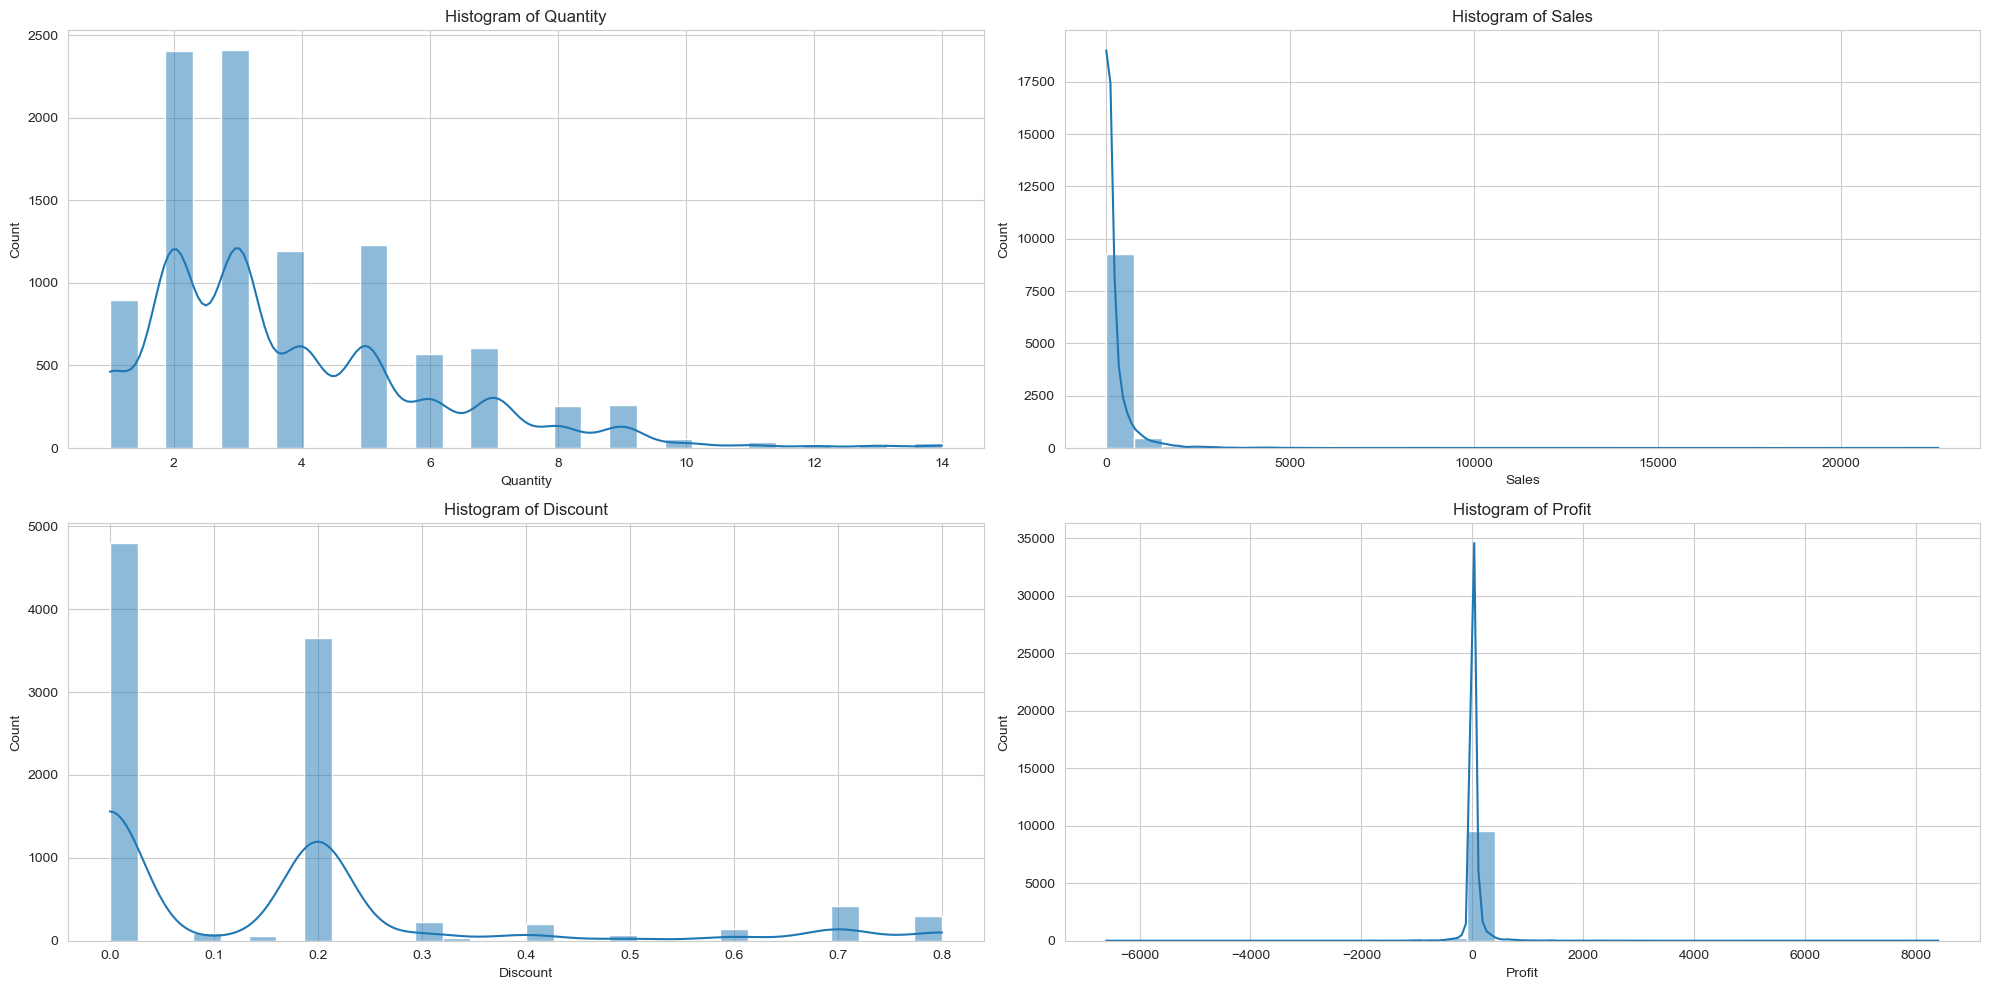

In [20]:
# Tentukan ukuran untuk menampung subplot
plt.figure(figsize=(20, 10))

# Histogram untuk 'Quantity'
plt.subplot(2, 2, 1)  # 2 baris, 2 kolom, subplot pertama
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Histogram of Quantity')

# Histogram untuk 'Sales'
plt.subplot(2, 2, 2)  # 2 baris, 2 kolom, subplot kedua
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Histogram of Sales')

# Histogram untuk 'Discount'
plt.subplot(2, 2, 3)  # 2 baris, 2 kolom, subplot ketiga
sns.histplot(df['Discount'], bins=30, kde=True)
plt.title('Histogram of Discount')

# Histogram untuk 'Profit'
plt.subplot(2, 2, 4)  # 2 baris, 2 kolom, subplot keempat
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Histogram of Profit')

plt.tight_layout() # Menyesuaikan tata letak untuk agak tidak tumpang tindih
plt.show()


Analisis untuk masing-masing variabel:

### Histogram  Quantity
- Distribusi 'Quantity' menunjukkan bahwa sebagian besar transaksi melibatkan penjualan jumlah produk yang kecil, dengan modus sekitar 2 hingga 3.
- Terdapat penurunan bertahap dalam jumlah transaksi seiring dengan peningkatan jumlah produk per transaksi, yang diindikasikan oleh frekuensi yang menurun di bar-bin yang lebih tinggi.
- Kurva KDE menunjukkan bahwa distribusi 'Quantity' cenderung memiliki satu modus utama (unik-modal), tetapi ada beberapa puncak lebih kecil yang mungkin menunjukkan tingkat pembelian produk tertentu yang umum dilakukan bersamaan.

### Histogram Sales
- Distribusi 'Sales' sangat skew ke kanan, dengan sebagian besar transaksi memiliki nilai penjualan yang rendah dan hanya beberapa transaksi yang memiliki nilai penjualan yang sangat tinggi.
- Ada satu puncak utama yang dekat dengan nol, menandakan bahwa nilai penjualan terbanyak berada pada kisaran yang lebih rendah.
- Histogram ini memperlihatkan adanya long tail ke arah nilai penjualan yang lebih tinggi, menandakan adanya outlier atau transaksi besar yang jarang terjadi.

### Histogram Discount
- Terlihat bahwa diskon paling sering diberikan pada dua tingkat khusus, yang terlihat dari dua puncak pada kurva KDE.
- Beberapa diskon sangat kecil dan mendekati nol, yang mungkin menunjukkan transaksi tanpa diskon atau dengan diskon minimal.
- Ada kemungkinan bahwa ada kebijakan diskon yang menerapkan nilai diskon tertentu pada sebagian besar produk, yang mungkin menciptakan puncak-puncak tersebut.

### Histogram Profit
- Distribusi 'Profit' memiliki rentang yang luas, dari kerugian besar hingga keuntungan besar.
- Modus distribusi terletak di sekitar titik nol hingga keuntungan kecil, menunjukkan bahwa kebanyakan transaksi menghasilkan keuntungan yang moderat.
- Seperti halnya dengan 'Sales', distribusi 'Profit' juga skew ke kanan, yang ditunjukkan oleh adanya long tail pada kedua sisi histogram, mengindikasikan bahwa ada transaksi dengan kerugian dan keuntungan yang signifikan, walaupun hal ini jarang terjadi.

### Kesimpulan 
Distribusi untuk setiap variabel menunjukkan karakteristik bisnis yang berbeda:
- **'Quantity' dan 'Profit'**: Berfokus pada transaksi dengan volume rendah hingga sedang dan keuntungan yang relatif stabil.
- **'Sales'**: Menunjukkan adanya kecenderungan penjualan dengan nilai rendah, tetapi juga adanya kemungkinan penjualan besar.
- **'Discount'**: Memperlihatkan pola diskon yang mungkin dikendalikan oleh kebijakan diskon.

Data ini memberikan wawasan untuk mengoptimalkan strategi penjualan dan diskon, serta potensi untuk menyelidiki lebih lanjut transaksi yang menghasilkan keuntungan atau kerugian ekstrem.

# Scatterplot

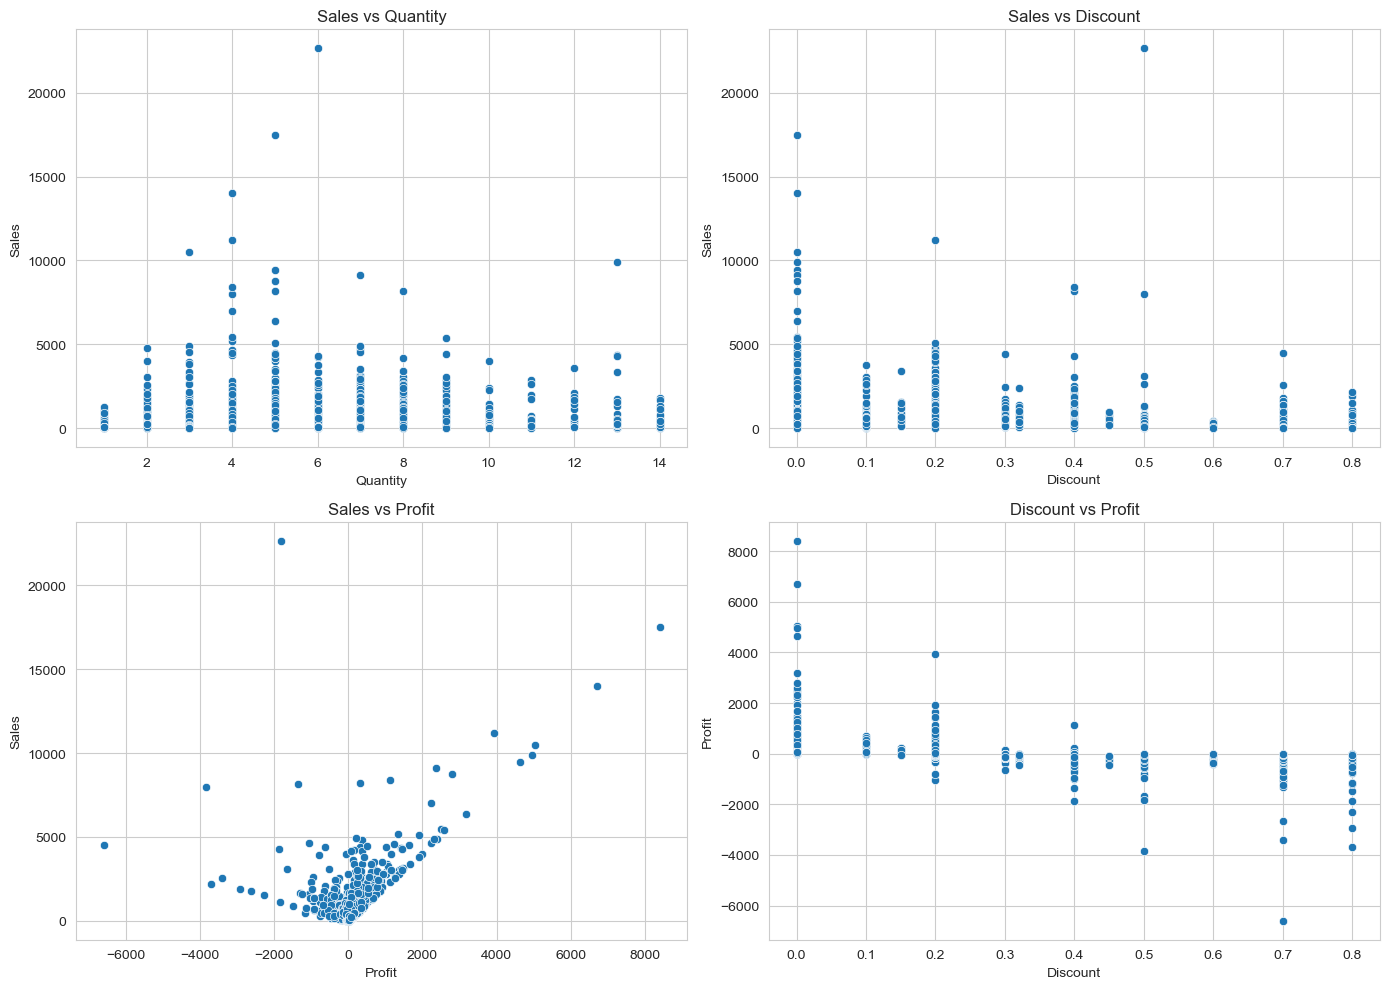

In [21]:
# Analisis hubungan antar atribut menggunakan scatterplot
# Tentukan ukuran untuk grid subplot
plt.figure(figsize=(14, 10))

# Sales vs Quantity
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
sns.scatterplot(x='Quantity', y='Sales', data=df)
plt.title('Sales vs Quantity')

# Sales vs Discount
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Sales vs Discount')

# Sales vs Profit
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
sns.scatterplot(x='Profit', y='Sales', data=df)
plt.title('Sales vs Profit')

# Discount vs Profit
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')

# Menyesuaikan tata letak untuk agak tidak tumpang tindih
plt.tight_layout()
plt.show()


Analisis dan kesimpulan untuk hubungan antar variabel:

### Sales vs Quantity
- Plot menunjukkan adanya tren positif; saat jumlah barang yang terjual meningkat, total penjualan juga cenderung meningkat. Ini adalah indikator yang baik bahwa penjualan lebih tinggi untuk transaksi dengan quantity yang lebih besar.
- Terdapat beberapa outlier dengan nilai penjualan yang sangat tinggi, yang mungkin mewakili penjualan grosir atau transaksi besar.

### Sales vs Discount
- Plot tidak menunjukkan hubungan yang jelas antara diskon dan total penjualan. Ini bisa berarti bahwa diskon tidak secara langsung berhubungan dengan peningkatan penjualan, atau mungkin ada faktor lain yang mempengaruhi penjualan selain diskon.
- Terdapat outlier dengan nilai diskon rendah dan penjualan yang tinggi, yang mungkin mengindikasikan promosi atau faktor lain yang berhasil meningkatkan penjualan tanpa memberikan diskon besar.

### Sales vs Profit
- Ada hubungan positif yang kuat antara penjualan dan keuntungan. Ini menunjukkan bahwa secara umum, penjualan yang lebih tinggi menghasilkan keuntungan yang lebih tinggi, yang diharapkan dalam praktik bisnis umum.
- Peningkatan keuntungan terlihat mulai meningkat secara signifikan setelah titik tertentu pada penjualan. Ini mungkin menunjukkan adanya ambang batas efisiensi operasional atau harga volume yang menguntungkan yang, ketika tercapai, keuntungan meningkat pada tingkat yang lebih tinggi.

### Discount vs Profit
- Plot menunjukkan beberapa titik data dengan diskon tinggi yang menghasilkan keuntungan rendah atau bahkan kerugian, yang mungkin menunjukkan bahwa diskon berlebihan bisa mengikis keuntungan.
- Sebaliknya, terlihat beberapa titik di mana diskon rendah atau sedang diikuti dengan keuntungan yang baik, menunjukkan diskon mungkin tidak perlu untuk mendapatkan keuntungan atau ada faktor lain yang lebih berperan dalam menghasilkan keuntungan.

### Kesimpulan Umum
- **Quantity dan Sales**: Menunjukkan hubungan yang erat, tetapi perlu dicatat bahwa penjualan tinggi tidak selalu berasal dari quantity tinggi.
- **Discount**: Tidak ada hubungan linear yang jelas antara diskon dan penjualan atau keuntungan, menunjukkan strategi diskon mungkin memerlukan evaluasi lebih lanjut.
- **Profit**: Muncul hubungan yang kuat antara penjualan dan keuntungan, tetapi keuntungan besar tidak selalu datang dari penjualan yang paling tinggi.

# Kolerasi Heatmap

In [22]:
correlation_matrix=df[['Quantity', 'Sales', 'Discount', 'Profit']].corr()
correlation_matrix

,Quantity,Sales,Discount,Profit
Quantity,1.000000,0.200795,0.008623,0.066253
Sales,0.200795,1.000000,-0.028190,0.479064
Discount,0.008623,-0.028190,1.000000,-0.219487
Profit,0.066253,0.479064,-0.219487,1.000000


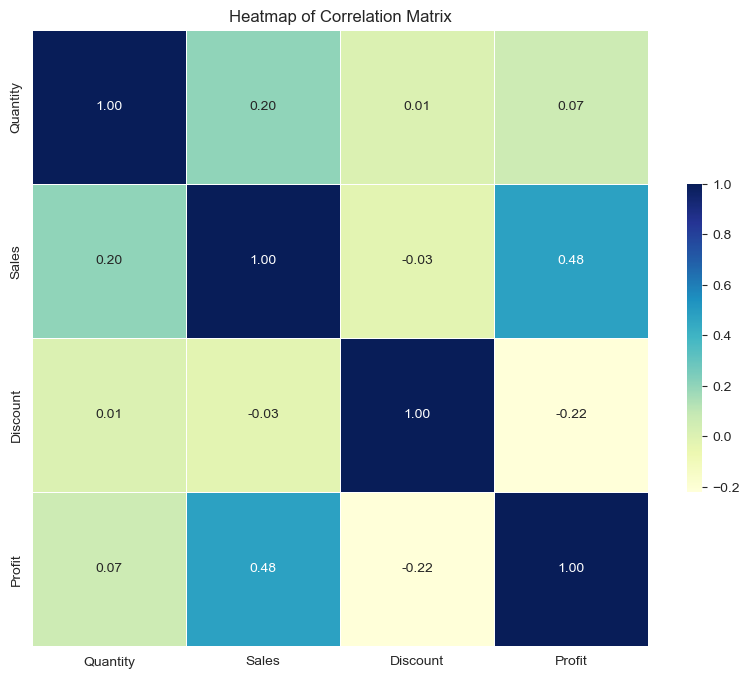

In [23]:
# Pengatur ukuran matplotlib
plt.figure(figsize=(10,8))

# Tampilkan heatmap dengan rasio aspek yang benar
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='YlGnBu',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of Correlation Matrix')
plt.show()


Kesimpulan yang dapat diambil dari heatmap tersebut adalah:
    
1. **Quantity dan Sales**: Nilai korelasi sebesar 0.20 menunjukkan adanya hubungan positif yang lemah antara jumlah barang yang terjual dan total penjualan. Ini berarti bahwa meningkatnya jumlah barang yang terjual cenderung sedikit meningkatkan total penjualan.

2. **Sales dan Profit**: Dengan nilai korelasi sebesar 0.48, ada hubungan positif yang moderat antara penjualan dan keuntungan. Ini mengindikasikan bahwa saat penjualan meningkat, keuntungan juga cenderung meningkat, namun hubungannya tidak sangat kuat. Ini bisa berarti bahwa faktor lain juga mempengaruhi keuntungan.

3. **Discount dan Profit**: Nilai korelasi -0.22 menunjukkan adanya hubungan negatif yang lemah antara diskon yang diberikan dan keuntungan yang dihasilkan. Meskipun tidak kuat, hubungan ini menyiratkan bahwa diskon yang lebih tinggi mungkin sedikit mengurangi keuntungan.

4. **Discount dan Sales**: Dengan nilai korelasi hampir nol (-0.03), hampir tidak ada hubungan linear antara diskon dan penjualan. Ini menunjukkan bahwa memberikan diskon tidak secara signifikan meningkatkan atau mengurangi total penjualan.

### Kesimpulan:
- **Quantity dan Sales**: Perusahaan mungkin perlu mencari strategi lain selain meningkatkan jumlah barang yang terjual untuk secara signifikan meningkatkan total penjualan.
- **Sales dan Profit**: Meningkatkan penjualan bisa menjadi salah satu strategi untuk meningkatkan keuntungan, tetapi masih perlu efisiensi operasional dan manajemen biaya yang baik untuk memastikan bahwa penjualan yang lebih tinggi juga menghasilkan keuntungan yang lebih tinggi.
- **Discount dan Profit**: Penggunaan diskon harus dipertimbangkan dengan hati-hati, karena memberikan diskon yang lebih besar tidak selalu menghasilkan keuntungan yang lebih tinggi.
- **Discount dan Sales**: Tidak ada bukti kuat bahwa diskon mengarah pada peningkatan penjualan, menunjukkan bahwa mungkin ada faktor lain yang lebih berpengaruh terhadap penjualan.

Secara umum, hubungan antar variabel ini cenderung tidak kuat, yang menunjukkan bahwa faktor kompleks dan interaksi lainnya berperan dalam dinamika penjualan dan keuntungan. Oleh karena itu, mungkin berguna untuk melihat lebih dekat pada data dengan segmentasi lebih lanjut berdasarkan kategori produk, waktu, atau demografi pelanggan untuk mendapatkan pemahaman yang lebih baik tentang apa yang mempengaruhi penjualan dan keuntungan.

# Analisis Waktu

1. Trend Penjualan Tahunan
2. Trend Penjualan Bulanan

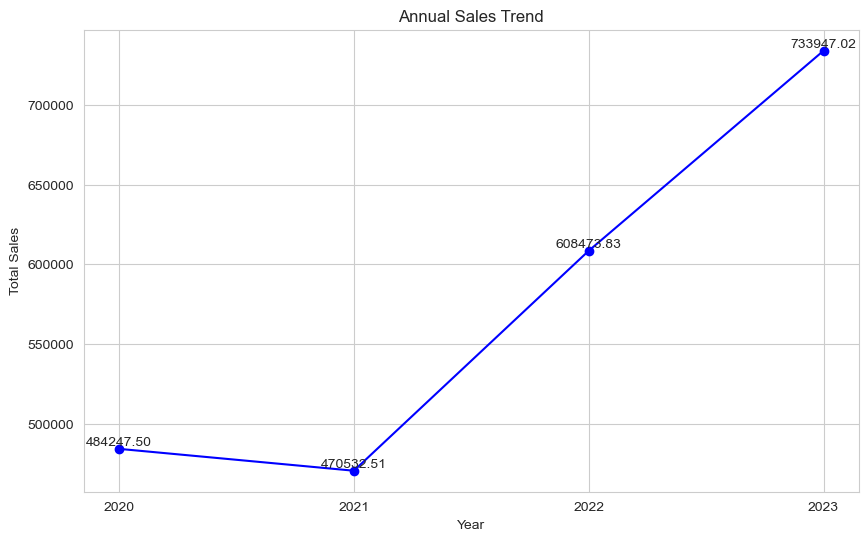

In [24]:
# Kelompokkan berdasarkan tahun 'Order Date' dan jumlah 'Sales'
annual_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

# Buat plot
plt.figure(figsize=(10, 6))
plt.plot(annual_sales.index.astype(str), annual_sales.values, marker='o', linestyle='-', color='b')

# Beri anotasi pada setiap titik data dengan nilai penjualan
for year, value in annual_sales.items():
    plt.text(str(year), value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Annual Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


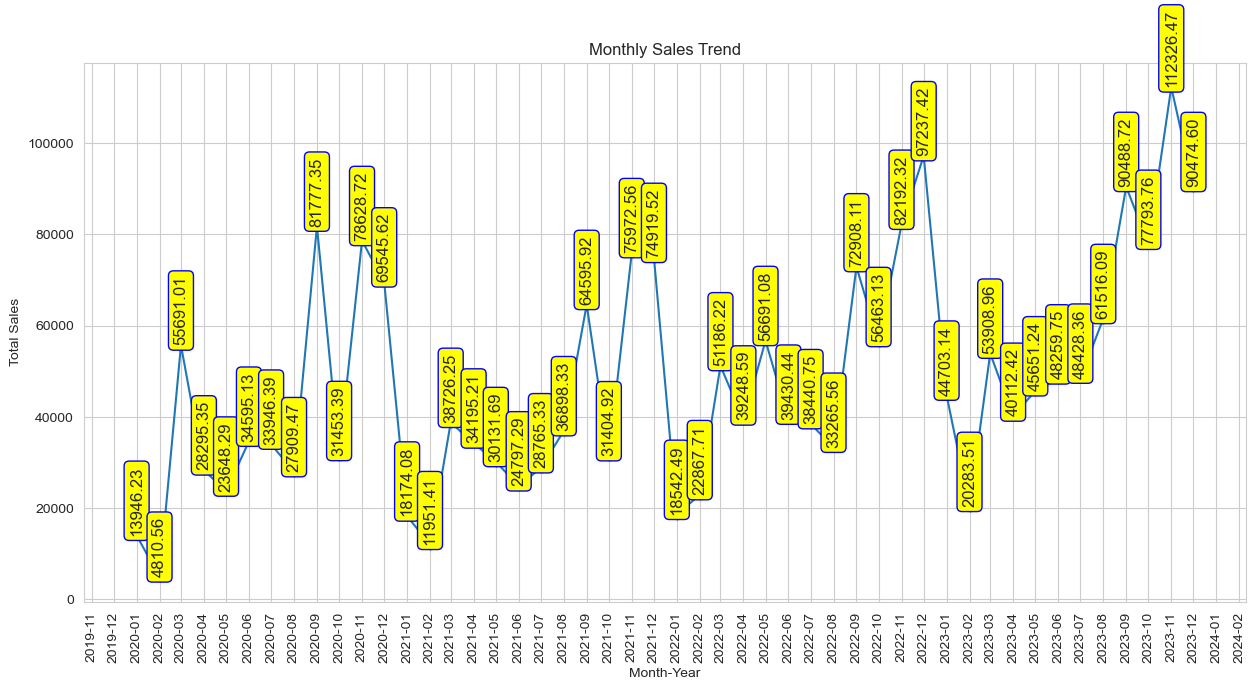

In [25]:
# Kelompokkan berdasarkan tahun dan bulan
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

# Ubah PeriodIndex menjadi DateTimeIndex untuk membuat plot
monthly_sales.index = monthly_sales.index.to_timestamp()

# Buat plot
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

# Atur penanda utama untuk sumbu-x agar menampilkan label setiap 2 bulan
# untuk data yang lebih padat atau sesuaikan sesuai kebutuhan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Atur format utama untuk menampilkan tanggal dalam format 'Tahun-Bulan'
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Tambahkan judul dan label
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

# Putar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=90)

# Beri anotasi pada setiap titik data dengan nilai penjualan
for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12,rotation=90,
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='yellow'))

plt.grid(True)
plt.show()


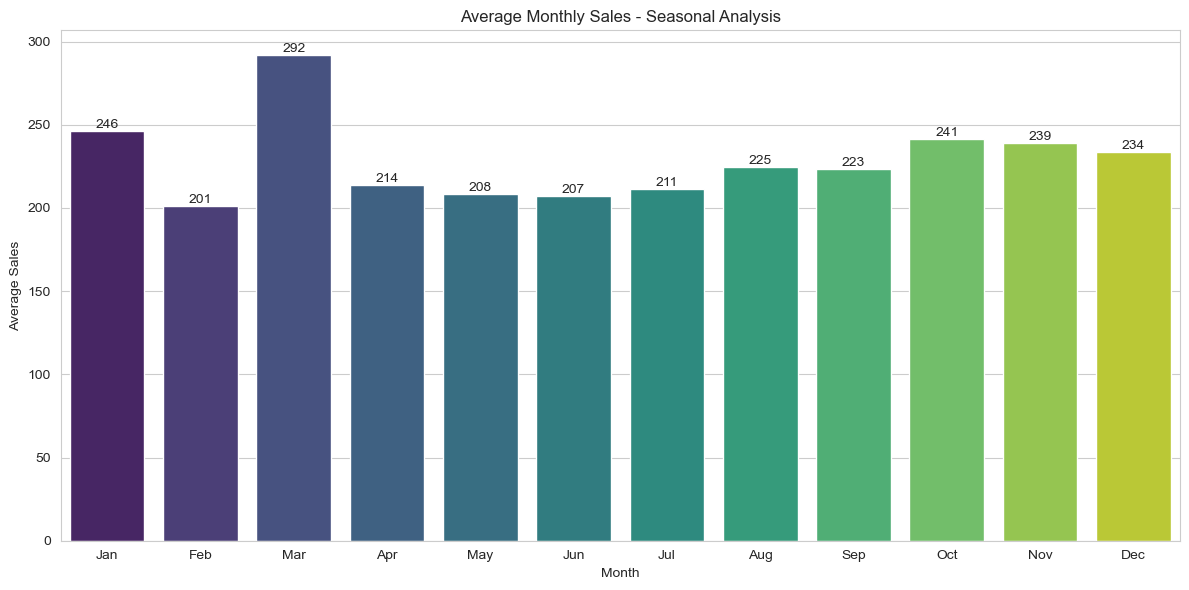

In [26]:
# Ekstrak bulan dari tanggal pemesanan
df['Month'] = df['Order Date'].dt.month

# Kelompokkan berdasarkan bulan dan hitung penjualan rata-rata setiap bulan sepanjang tahun
seasonal_sales = df.groupby('Month')['Sales'].mean()

# Buat plot batang untuk penjualan rata-rata per bulan
plt.figure(figsize=(12, 6))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette="viridis")

# Tambahkan label nilai di atas setiap batang
for index, value in enumerate(seasonal_sales.values):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom')

# Tambahkan judul plot dan label sumbu
plt.title('Average Monthly Sales - Seasonal Analysis')
plt.xlabel('Month')
plt.ylabel('Average Sales')

# Atur label sumbu x menjadi nama bulan
plt.xticks(seasonal_sales.index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()  # Sesuaikan tata letak untuk mencegah tumpang tindih
plt.show()


Kesimpulan yang dapat diambil dari Analisis Waktu:

1. **Bulan Penjualan Tertinggi**: Maret menonjol dengan penjualan rata-rata tertinggi, ditunjukkan oleh batang tertinggi pada 292. Kemungkinan disebabkan oleh promosi musiman, acara khusus, atau pola perilaku konsumen yang khas pada waktu tahun ini.

2. **Bulan Penjualan Terendah**: Februari memiliki penjualan rata-rata terendah di 201, yang mungkin disebabkan karena ini adalah bulan terpendek.

3. **Peningkatan Akhir Tahun**: Terdapat peningkatan penjualan rata-rata yang terlihat pada Oktober dan November, yang mungkin dikaitkan inisiatif penjualan akhir tahun.

### Insight:
- Data menunjukkan puncak penjualan signifikan di bulan Maret yang mungkin memerlukan analisis lebih lanjut untuk memahami faktor-faktor yang berkontribusi terhadap lonjakan ini.
- Terdapat pemulihan penjualan yang stabil pasca-Februari, menunjukkan adanya musiman dalam perilaku pembelian konsumen.
- Peningkatan penjualan rata-rata menjelang akhir tahun bisa mencerminkan strategi penjualan efektif selama musim liburan, atau tren pasar umum.
- Secara strategis, mungkin menguntungkan untuk memanfaatkan tren meningkat menjelang akhir tahun dan mengeksplorasi apa yang mendorong puncak Maret untuk direplikasi di bulan lain atau mengurangi penurunan Februari.
- Bisnis mungkin perlu menyesuaikan upaya pemasaran, inventaris, dan strategi penjualan berdasarkan tren ini untuk mengoptimalkan penjualan sepanjang tahun.

# Analisis Penjualan per Produk
1. Menentukan produk yang paling laris dan yang kurang populer
2. Menghitung kontribusi setiap produk terhadap total penjualan.

Top-Selling Products:


,Total Sales,Sales Contribution (%)
Product,,
ContactMatcher,410378.265,17.864274
FinanceHub,340935.415,14.841341
Site Analytics,330007.054,14.365616
Marketing Suite - Gold,223843.608,9.744190
Big Ol Database,189238.631,8.237792



Least-Selling Products:


,Total Sales,Sales Contribution (%)
Product,,
OneView,107532.161,4.681008
SaaS Connector Pack,91705.164,3.992039
ChatBot Plugin,27118.792,1.180515
SaaS Connector Pack - Gold,16476.402,0.717238
Storage,3024.280,0.131651


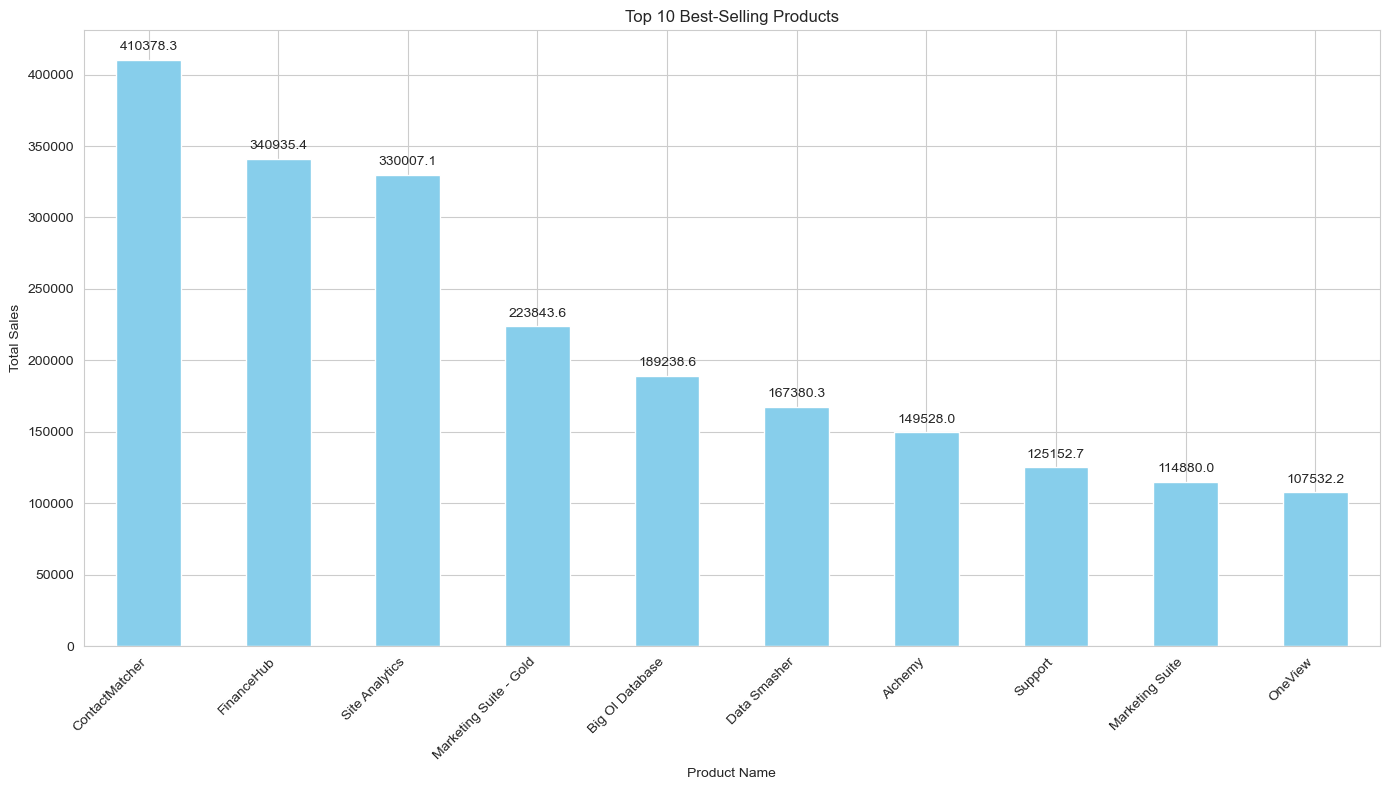

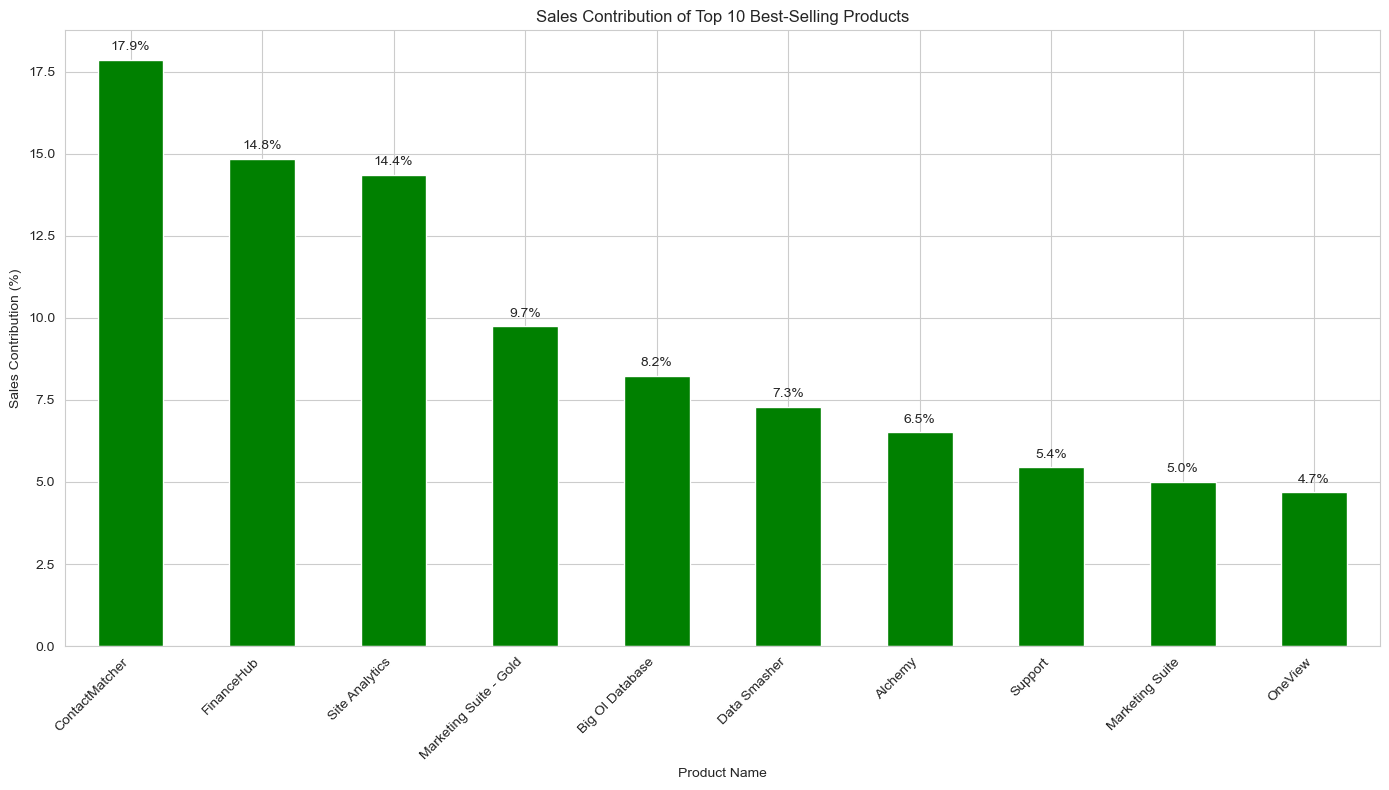

In [27]:
# Kelompokkan data berdasarkan Product dan Sales total penjualan untuk setiap produk
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

# Hitung kontribusi masing-masing produk terhadap total penjualan
total_sales = product_sales.sum()
product_sales_contribution = (product_sales / total_sales) * 100

# Gabungkan total penjualan dan kontribusi penjualan ke dalam satu DataFrame untuk memudahkan analisis
product_sales_df = pd.DataFrame({
    'Total Sales': product_sales,
    'Sales Contribution (%)': product_sales_contribution
})

# Urutkan DataFrame berdasarkan total penjualan untuk mengidentifikasi produk terlaris
product_sales_df = product_sales_df.sort_values('Total Sales', ascending=False)

# Tampilkan produk terlaris dan paling sedikit terjual
print("Top-Selling Products:")
display(product_sales_df.head())

print("\nLeast-Selling Products:")
display(product_sales_df.tail())

# Visualisasikan produk terlaris
top_n = 10  # 10 tampilkan 10 besar produk terlaris
top_products_sales = product_sales_df.head(top_n)

plt.figure(figsize=(14, 8))
ax = product_sales_df.head(top_n)['Total Sales'].plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

# Tambahkan label nilai di atas bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Visualisasikan kontribusi penjualan produk terlaris
plt.figure(figsize=(14, 8))
ax2 = product_sales_df.head(top_n)['Sales Contribution (%)'].plot(kind='bar', color='green')
plt.title(f'Sales Contribution of Top {top_n} Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales Contribution (%)')
plt.xticks(rotation=45, ha='right')

# Tambahkan label nilai di atas bar
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.1f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()


Kesimpulan yang dapat diambil dari Analisis Penjualan per Produk:
- Rekap untuk 5 Produk penjualan terlaris
1. **ContactMatcher** : Produk ini menjadi volume penjualan tertinggi 410,378.265 dengan kontribusi terbesar 17.9%.
2. **FinanceHub** : Produk ini memiliki volume penjualan tertinggi kedua 340,935.415 dengan kontribusi terbesar 14.8%
3. **SiteAnalytics** : Produk ini memiliki volume penjualan tertinggi ketiga 330,007.054 dengan kontribusi terbesar 14.4%
4. **MarketingSuite** : Produk ini memiliki volume penjualan tertinggi keempat  223,843.608 dengan kontribusi terbesar 9.7%
5. **Big OI Database** : Produk ini memiliki volume penjualan tertinggi kelima 189,238.631 dengan kontribusi terbesar 8.2%

- Rekap untuk 5 produk penjualan terendah
1. **OneView**: Memiliki total penjualan terkecil di antara produk terlaris yaitu 107,532.161,dengan kontribusi 4.68% .
2. **SaaS Connector Pack** : Dengan total penjualan 91,705.164 dan kontribusi 3.99%.
3. **ChatBot Plugin**: Total penjualan yang lebih rendah di 27,118.792 dengan kontribusi 1.18%.
4. **SaaS Connector Pack - Gold**: Dengan penjualan yang jauh lebih rendah pada 16,476.402 dan kontribusi hanya 0.71%.
5. **Storage**: Dengan total penjualan terendah yaitu 3,024.280 dan kontribusi yang hampir tidak signifikan sebesar 0.13%.

## Insight
- Analisis ini mengidentifikasi produk yang mendorong pendapatan dan produk yang mungkin memerlukan strategi pemasaran yang lebih terfokus atau pengembangan ulang.
- Produk dengan penjualan dan kontribusi yang tinggi seperti ContactMatcher dan FinanceHub harus terus didukung dan mungkin dapat memberikan wawasan untuk pengembangan produk baru.
- Produk kurang laku mungkin perlu dianalisis lebih dalam untuk menentukan penyebab penjualan yang rendah, seperti kebutuhan pasar, fitur produk, atau strategi penetapan harga.

# Analisis Penjualan per Wilayah
1. Mengidentifikasi wilayah atau negara dengan penjualan tertinggi dan terendah 
2. Memahami distribusi geografis penjualan.


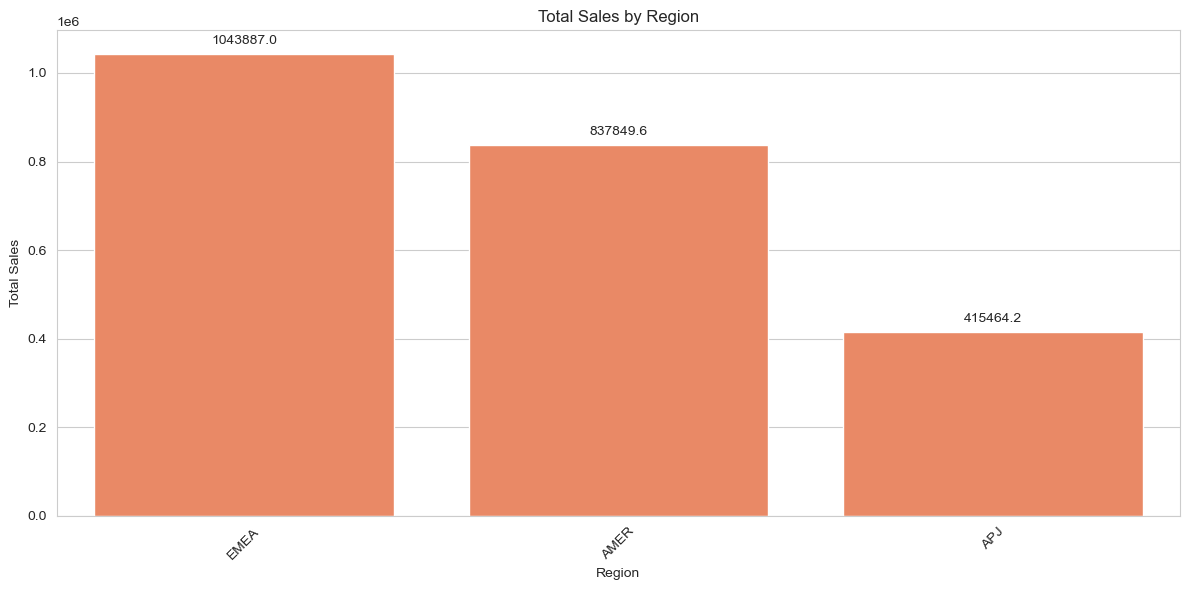

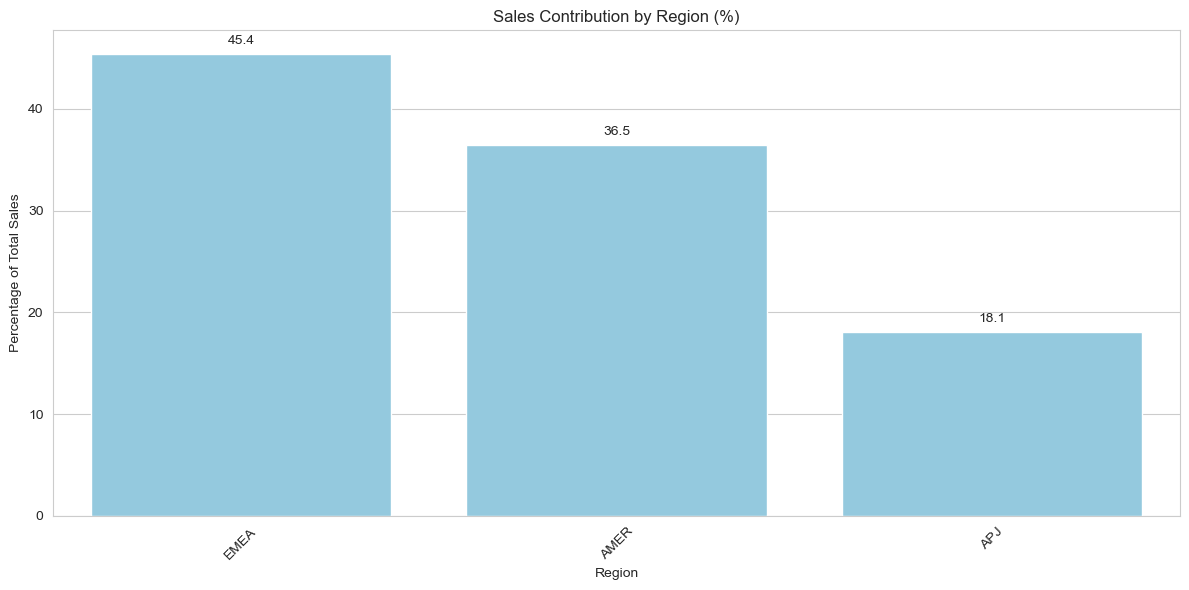

In [28]:
# Kelompokkan data berdasarkan wilayah dan hitung total penjualan untuk setiap wilayah
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Hitung total penjualan untuk perbandingan
total_sales = region_sales.sum()

# Hitung kontribusi masing-masing daerah terhadap total penjualan
region_sales_percentage = (region_sales / total_sales) * 100

# Plot total sales per wilayah
plt.figure(figsize=(12, 6))
ax3 = sns.barplot(x=region_sales.index, y=region_sales.values, color='coral')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Tambahkan label nilai di atas bar
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.1f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Plot kontribusi masing-masing daerah terhadap total penjualan
plt.figure(figsize=(12, 6))
ax4 = sns.barplot(x=region_sales_percentage.index, y=region_sales_percentage.values, color='skyblue')
plt.title('Sales Contribution by Region (%)')
plt.xlabel('Region')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=45)

# Tambahkan label nilai di atas bar
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.1f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 xytext=(0, 9), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()


Kesimpulan yang dapat diambil dari Analisis Penjualan per Wilayah atau Negara:
1. **EMEA (Europe, Middle East, and Africa):** EMEA memiliki total penjualan tertinggi dengan angka signifikan, mencapai 1,043,887 dan memberikan kontribusi sebesar 45.4% terhadap total penjualan. Ini menunjukkan bahwa **wilayah EMEA menjadi pasar yang paling menguntungkan atau yang memiliki basis pelanggan terbesar**.
2. **AMER (Americas):** Total penjualan di wilayah ini berada di posisi kedua dengan angka 837,849.6 dan berkontribusi sebesar 36.5% terhadap total penjualan. Meski tidak sebesar EMEA, angka ini menunjukkan bahwa **Americas juga merupakan pasar yang kuat dengan potensi pertumbuhan untuk mencapai atau bahkan melampaui kontribusi yang diberikan oleh EMEA**.
3. **APJ (Asia Pacific and Japan):** Dengan total penjualan sebesar 415,464.2, wilayah ini memberikan kontribusi sebanyak 18.1% terhadap total penjualan, yang merupakan yang terendah dibandingkan dengan dua wilayah lainnya. **Penjualan yang lebih rendah  ini dapat mengindikasikan bahwa perusahaan menghadapi persaingan yang ketat di wilayah APJ.**

## Insight
- **Meningkatkan Kinerja di APJ:** Fokus pada strategi pertumbuhan di APJ dapat sangat bermanfaat. Belajar dari kesuksesan di EMEA dan mengadaptasi strategi yang sesuai untuk meningkatkan penjualan di APJ.
- **Optimalisasi di AMER:** Mencari cara untuk meningkatkan total penjualan dan efisiensi di AMER dapat membantu wilayah ini memberikan kontribusi yang lebih besar terhadap total penjualan.
- **Pertahankan Dominasi EMEA:** Mempertahankan posisi dominan di EMEA sangat penting. Analisis mendalam tentang faktor-faktor yang mendorong kinerja tinggi ini dapat membantu perusahaan dalam mempertahankan dan memperluas pangsa pasarnya.

# Strategi Diskon
Menganalisis efektivitas strategi diskon yang berbeda terhadap penjualan dan keuntungan, dan menggunakan insight tersebut untuk mengoptimalkan penawaran diskon di masa depan.

In [71]:
df['Discount'].value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

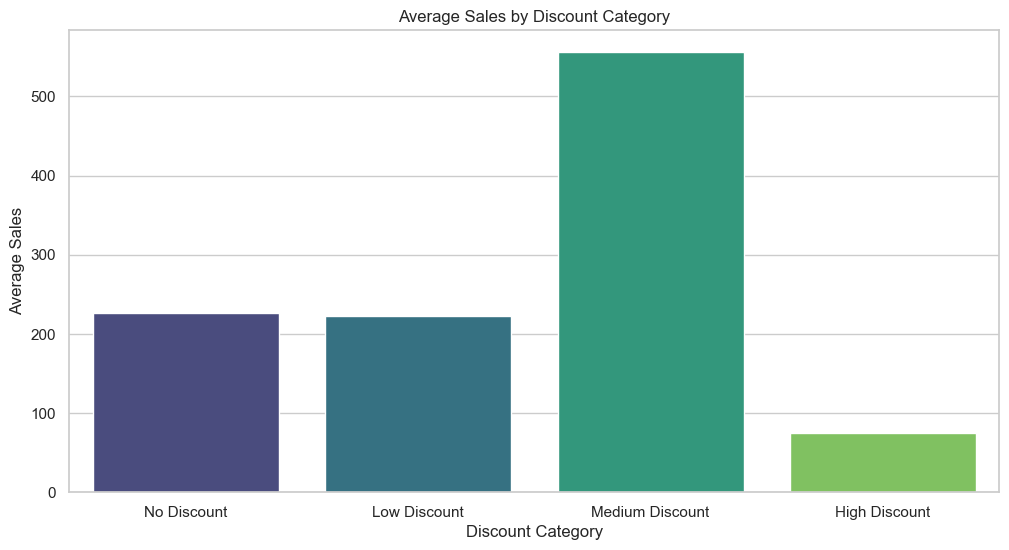

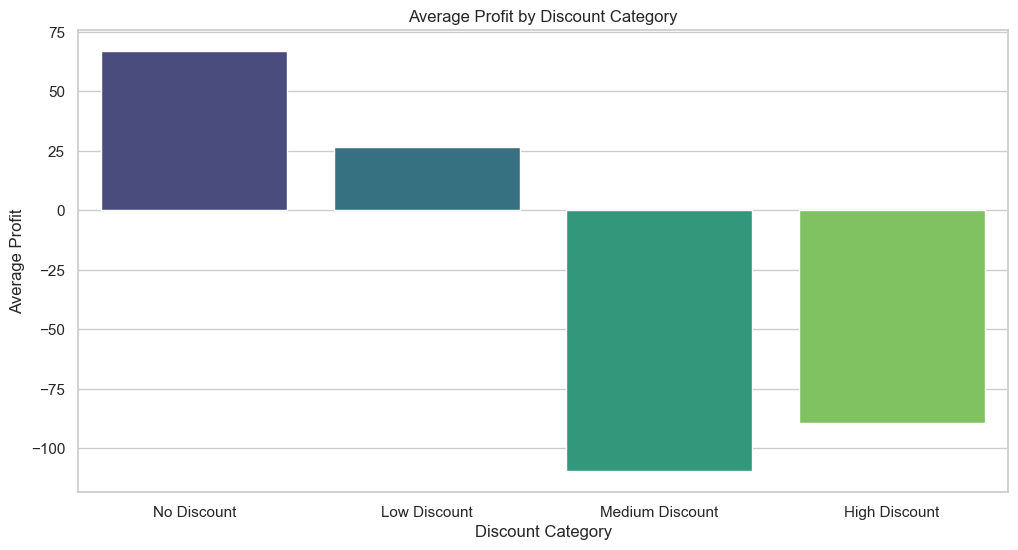

Korelasi antara Penjualan dan Keuntungan berdasarkan Diskon: -0.34


In [77]:
# Langkah 1: Membuat kategori diskon berdasarkan range yang ada
# Misalnya, diskon dibagi menjadi kelompok: Tidak ada diskon (0%), Diskon rendah (1-20%), Diskon sedang (21-50%), dan Diskon tinggi (lebih dari 50%)
# Ini hanya contoh, Anda mungkin perlu menyesuaikan kategori ini berdasarkan data Anda

# Definisikan fungsi untuk mengkategorikan diskon
def discount_category(discount):
    if discount == 0:
        return 'No Discount'
    elif discount <= 0.2:
        return 'Low Discount'
    elif discount <= 0.50:
        return 'Medium Discount'
    else:
        return 'High Discount'

# Terapkan fungsi ke kolom 'Discount' untuk membuat kolom kategori baru
df['Discount Category'] = df['Discount'].apply(discount_category)

# Langkah 2: Menghitung rata-rata penjualan dan keuntungan untuk setiap kategori diskon
discount_analysis = df.groupby('Discount Category')[['Sales', 'Profit']].mean().reset_index()

# Define the order of the categories
category_order = ['No Discount', 'Low Discount', 'Medium Discount', 'High Discount']

# Sort the DataFrame based on the category order
discount_analysis['Discount Category'] = pd.Categorical(
    discount_analysis['Discount Category'], 
    categories=category_order, 
    ordered=True
)

discount_analysis.sort_values('Discount Category', inplace=True)
# Langkah 3: Menganalisis korelasi
correlation_discount_sales = discount_analysis['Sales'].corr(discount_analysis['Profit'])

# Langkah 4: Visualisasi dengan bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Discount Category', y='Sales', data=discount_analysis, order=category_order, palette="viridis")
plt.title('Average Sales by Discount Category')
plt.ylabel('Average Sales')
plt.xlabel('Discount Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Discount Category', y='Profit', data=discount_analysis, order=category_order, palette="viridis")
plt.title('Average Profit by Discount Category')
plt.ylabel('Average Profit')
plt.xlabel('Discount Category')
plt.show()

# Langkah 5: Uji hipotesis (optional)
# Anda dapat melakukan uji ANOVA atau uji t untuk menentukan apakah ada perbedaan yang signifikan
# antara grup diskon berdasarkan penjualan dan keuntungan

# Catatan: Langkah 5 melibatkan analisis statistik yang lebih dalam dan biasanya memerlukan pemahaman yang baik tentang uji statistik.

print(f'Korelasi antara Penjualan dan Keuntungan berdasarkan Diskon: {correlation_discount_sales:.2f}')


Dari visualisasi tersebut, kita dapat menarik kesimpulan sebagai berikut

1. **Rata-Rata Penjualan Berdasarkan Kategori Diskon**:
   - Kategori 'No Discount' memiliki penjualan rata-rata yang moderat
   - Penjualan rata-rata meningkat secara progresif dengan besarnya diskon, mencapai puncak yang signifikan pada kategori 'High Discount'.
   - Hal ini menunjukkan bahwa diskon yang lebih tinggi mungkin mendorong volume penjualan yang lebih besar.

2. **Rata-Rata Keuntungan Berdasarkan Kategori Diskon**:
   - Kategori  'No Discount' menunjukkan rata-rata keuntungan tertinggi.
   - Terdapat penurunan keuntungan rata-rata yang cukup terlihat seiring dengan peningkatan diskon, dengan kategori 'High Discount' menunjukkan kerugian yang signifikan.
   - Pola ini menunjukkan bahwa meskipun diskon yang lebih tinggi meningkatkan volume penjualan, tapi tidak menguntungkan dan  mengakibatkan kerugian.

3. **Korelasi Antara Penjualan dan Keuntungan**:
   - Koefisien korelasi negatif sebesar -0.34 menunjukkan bahwa ada hubungan terbalik yang lemah antara penjualan dan keuntungan ketika mempertimbangkan tingkat diskon. Ini berarti bahwa seiring peningkatan penjualan karena diskon yang lebih tinggi, keuntungan cenderung menurun, tetapi tidak secara kuat.

### Insight:
- Diskon mendorong penjualan tetapi tidak selalu meningkatkan keuntungan. Bahkan, diskon yang berlebihan dapat mengikis margin keuntungan, mengakibatkan kerugian.
- Strategi menawarkan diskon tinggi untuk meningkatkan penjualan masih perlu dievaluasi kembali karena tidak berubah menjadi keuntungan yang lebih tinggi.
- Perusahaan perlu mengoptimalkan tingkat diskon, mungkin dengan menawarkan diskon yang lebih kecil atau menargetkan diskon secara lebih strategis untuk menyeimbangkan volume penjualan dengan keuntungan.




# Analisis Profitabilitas per Produk

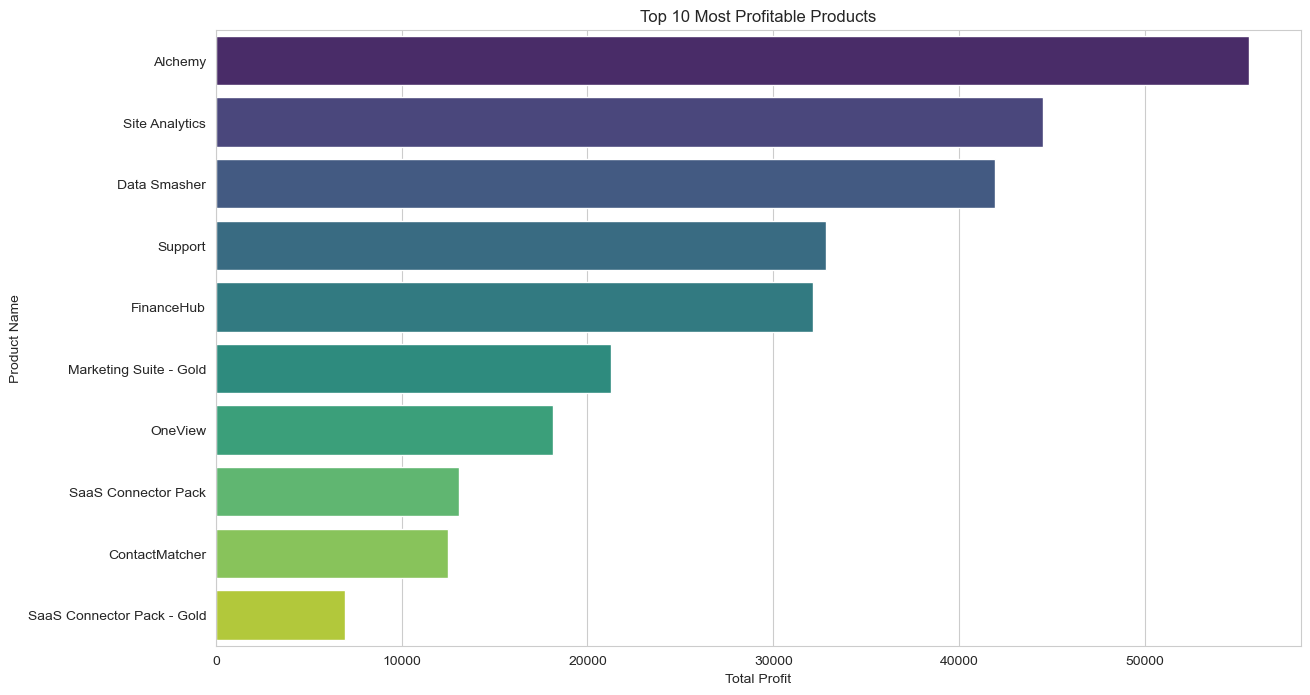

In [30]:
# Kelompokkan data berdasarkan 'Product' dan hitung total profit
product_profit = df.groupby('Product')['Profit'].sum().sort_values(ascending=False)

# Kelompokkan data berdasarkan 'Product' dan hitung jumlah unit yang terjual
product_sales_volume = df.groupby('Product')['Quantity'].sum()

# Menggabungkan kedua Series di atas ke dalam satu DataFrame
product_profitability = pd.DataFrame({'Total Profit': product_profit, 'Sales Volume': product_sales_volume})

# Sortir DataFrame berdasarkan 'Total Profit' untuk melihat produk paling menguntungkan
product_profitability = product_profitability.sort_values('Total Profit', ascending=False)

# Visualisasi Top N produk yang paling menguntungkan dengan bar chart
top_n = 10
top_products_profit = product_profitability.head(top_n)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_products_profit['Total Profit'], y=top_products_profit.index, palette='viridis')
plt.title(f'Top {top_n} Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

# Jika kolom untuk nama produk tersedia, gunakan itu untuk label sumbu y.


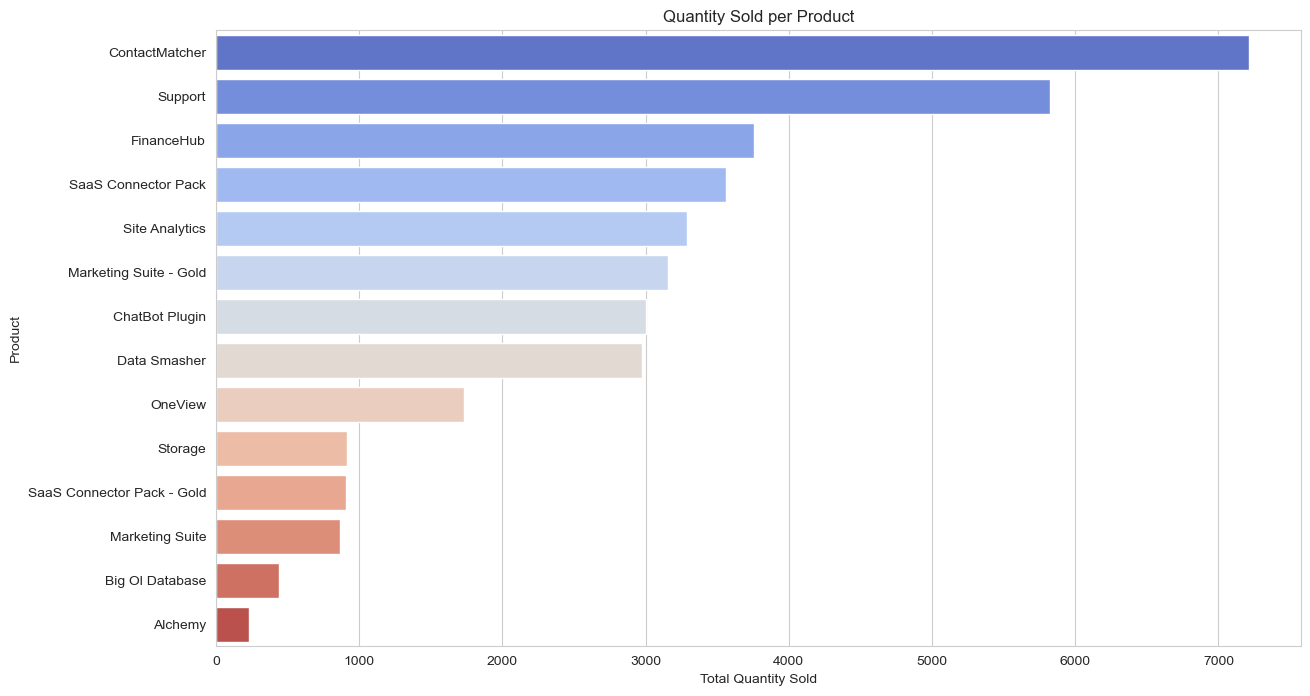

In [29]:
# Group the data by the product and sum up the quantity sold
product_quantity_sold = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)

# Create a bar plot to visualize the quantity sold per product
plt.figure(figsize=(14, 8))
sns.barplot(x=product_quantity_sold.values, y=product_quantity_sold.index, palette='coolwarm', orient='h')
plt.title('Quantity Sold per Product')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()



# Kesimpulan Profitabilitas per Produk
1. Alchemy merupakan produk dengan keuntungan tertinggi memiliki margin keuntungan yang lebih baik.
2. ContactMatcher menunjukkan keuntungan yang lebih rendah tetapijadi produk dengan penjualan terlaris
3. SaaS Connector Pack - Gold walau secara total penjualan berada dalam 5 terendah, tetapi menjadi 10 besar produk dengan keuntungan terbesar menandakan bahwa  memiliki  potensi untuk dikembangkan lebih lanjut

# Analisis jumlah penjualan per produk

Penjelasan untuk grafik "Quantity Sold per Product":

1. **Top-Selling Products**: The product "ContactMatcher" appears to be the top-selling item by a significant margin, indicating strong demand or effective sales strategies for this product.

2. **Sales Distribution**: There is a notable decrease in quantity sold as you move down from the top-selling product. This could imply that a small number of products make up a large portion of total sales—a common pattern known as the Pareto principle or the 80/20 rule.

3. **Potential for Cross-Selling**: Products that are selling in moderate quantities, like "SaaS Connector Pack" and "Site Analytics," could be targets for cross-selling strategies, especially if they complement the top-selling items.

4. **Inventory Considerations**: The data suggests that inventory for "ContactMatcher" should be prioritized, and it may be beneficial to analyze why this product is so popular. For lower-selling products, it might be worth investigating whether they are underperforming due to market fit, awareness, or competition.

5. **Product Line Review**: Products with very low sales quantities, such as "Alchemy" and "Big Ol Database," may require further analysis to determine if they are new products still gaining traction, if they need additional marketing support, or if they should be considered for discontinuation.

6. **Market Strategy**: The significant difference between the top-selling and the least-selling products could also prompt a review of the product placement, pricing strategy, and promotional efforts to boost the sales of the less popular products.

This analysis is important for making informed decisions on product development, marketing strategies, and inventory management. It's also a starting point for deeper investigation into customer behavior and preferences.

Penjelasan untuk grafik "Distribution of Quantity Sold"

1. **Most Common Quantities**: The most common quantities sold per transaction seem to be around 2 to 4 items. This is indicated by the tallest bars in the histogram.

2. **Skewness**: The distribution appears right-skewed, meaning there are a number of transactions with higher quantities, but these are less frequent.

3. **Bulk Purchases**: There are peaks at regular intervals (such as around 2, 4, 6), which could suggest that certain bulk purchase options are popular among customers, or it could be related to packaging (e.g., items sold in packs of 2, 4, 6, etc.).

4. **Low-Frequency High Quantity**: Transactions with a very high quantity (towards the right end of the histogram) are much less frequent. These might represent bulk purchases by a few customers.

### Kesimpulan:
- **Purchasing Patterns**: Customers are most frequently purchasing small to moderate quantities of products.
- **Inventory Planning**: Stock should be optimized for the sale of 2-4 units per transaction, as these are the most common quantities sold.
- **Promotion Strategies**: Marketing and promotions might be designed to encourage larger quantities per sale, given the prevalence of smaller quantity transactions.
- **Bulk Sales Opportunities**: The peaks at regular intervals suggest an opportunity to review bulk sales strategies or pricing structures to encourage larger purchases.

This histogram can inform decisions on inventory management, marketing, and sales strategy. Understanding customer buying patterns helps a business tailor its approach to meet customer demand and capitalize on the most common purchasing trends.

In [31]:
df.to_csv('cleaned_data_capstone.csv', index=False)